# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Automated Anomaly Detection using Z-score method

**Steps**:
1. Data Set: Download a dataset representing daily sales figures for a retail store.
2. Calculate Z-score: Compute the mean and standard deviation of the sales. Use these to
calculate the Z-score for each day's sales figure.
3. Identify Anomalies: Detect anomalies by identifying values with a Z-score above 3 or below -3.
4. Visualize: Plot a graph to visualize anomalies.

=== Z-Score Based Anomaly Detection ===

Detected Anomalies:
           Date       Sales   Z_score  Anomaly
20  2023-01-21  350.000000  5.773959        1
150 2023-05-31   50.000000 -5.784317        1
159 2023-06-09  298.548274  3.791648        1


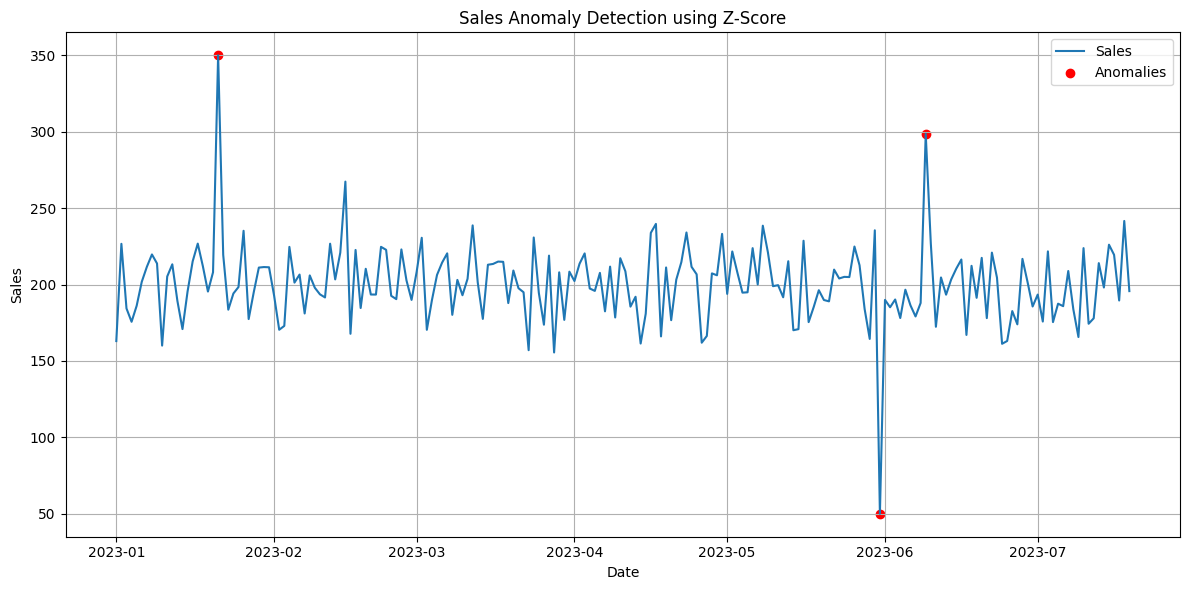

In [1]:
# write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------
# Step 1: Generate or Load Sales Dataset
# ---------------------
def load_sales_data():
    # Simulating daily sales data for 200 days
    dates = pd.date_range(start='2023-01-01', periods=200)
    sales = np.random.normal(loc=200, scale=20, size=200)

    # Inject anomalies
    sales[20] = 350
    sales[150] = 50

    df = pd.DataFrame({
        'Date': dates,
        'Sales': sales
    })
    return df

# ---------------------
# Step 2 & 3: Calculate Z-score and Identify Anomalies
# ---------------------
def detect_anomalies(df):
    mean_sales = df['Sales'].mean()
    std_sales = df['Sales'].std()
    df['Z_score'] = (df['Sales'] - mean_sales) / std_sales
    df['Anomaly'] = df['Z_score'].apply(lambda z: 1 if np.abs(z) > 3 else 0)
    return df

# ---------------------
# Step 4: Visualize Anomalies
# ---------------------
def plot_anomalies(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Sales'], label='Sales')
    anomalies = df[df['Anomaly'] == 1]
    plt.scatter(anomalies['Date'], anomalies['Sales'], color='red', label='Anomalies')
    plt.title("Sales Anomaly Detection using Z-Score")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------------------
# Main Execution
# ---------------------
if __name__ == "__main__":
    print("=== Z-Score Based Anomaly Detection ===")
    sales_df = load_sales_data()
    sales_df = detect_anomalies(sales_df)
    print("\nDetected Anomalies:\n", sales_df[sales_df['Anomaly'] == 1])
    plot_anomalies(sales_df)
